In [31]:
import numpy as np
from sklearn import cross_validation, svm, neighbors
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
#make a copy of the dataframe which will be used for visualization later ohn
dfvis = df.copy()

In [34]:
#Convert text columns to numeric by assigning a numeric value

df.drop(['customerID'],1, inplace = True) #drop customerID as it serves no useful purpose in machine learning

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,1,1,2,1,0,1,1,1,1,1,0,3,29.85,2811,1
1,1,0,1,1,34,0,2,2,0,1,0,1,1,1,2,1,0,56.95,1735,1
2,1,0,1,1,2,0,2,2,0,0,1,1,1,1,1,0,0,53.85,1498,0
3,1,0,1,1,45,1,1,2,0,1,0,0,1,1,2,1,2,42.30,4465,1
4,0,0,1,1,2,0,2,0,1,1,1,1,1,1,1,0,3,70.70,4520,0


In [36]:
#Plug all features into SVM model to see what the prediction accuracy is

X= np.array(df.drop(['Churn'],1))
y = np.array(df['Churn'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

#clf = LinearRegression() - use if you want linear regression model instead
clf=svm.SVC()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7459190915542938


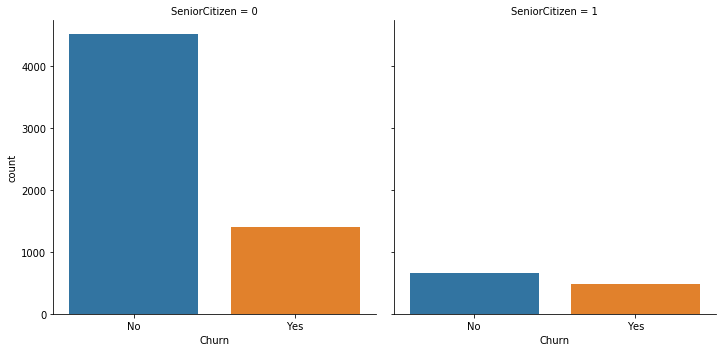

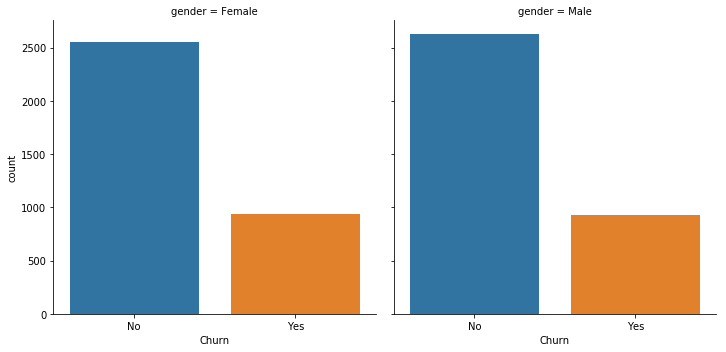

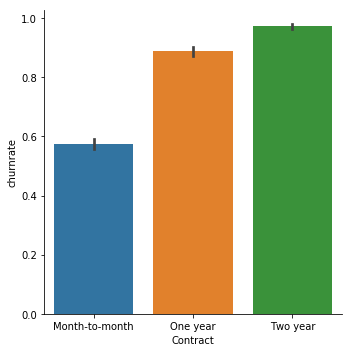

In [37]:
#Visually wee which features seem to have a correlation with churn. This will enable us to drop features with no correlation to churn

import warnings
warnings.filterwarnings("ignore")

dfvis['churnrate'] = df['Churn']
sns.catplot('Churn', col = 'SeniorCitizen', kind = 'count', data = dfvis)
sns.catplot('Churn', col = 'gender', kind = 'count', data = dfvis)
sns.catplot(x= 'Contract', y= 'churnrate',  data = dfvis, kind = 'bar')

In [38]:
#There seeems to be correlation between churn and senior citizne
#There seems to be correlation between churn and contract type
#There seems to be no correlation between churn and gender

In [39]:
#New dataframe with only predicted valuable features
df.drop(['gender', 'Partner', 'Dependents', 'tenure','TotalCharges', 'PaymentMethod',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling'],1, inplace= True)

In [40]:
df.head()

,SeniorCitizen,Contract,MonthlyCharges,Churn
0,0,1,29.85,1
1,0,2,56.95,1
2,0,1,53.85,0
3,0,2,42.30,1
4,0,1,70.70,0


In [41]:
#Re-run machine learning model

X= np.array(df.drop(['Churn'],1))
y = np.array(df['Churn'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

clf=svm.SVC()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7487579843860894


In [43]:
#clearly keeping only these features did not change the prediction accuracy.
#This could also mean that all we need to do if find out if a customer is a senior citizen, type of contract
#and monthly charges in order to determine with 75% accuracy whehter this customer will churn or not.

In [46]:
#Try a prediction with a dataset not present in the original dataframe
#let's try, not a senior citizen, contrat month-month, and $30 charge per month
example_measures = np.array([[0,1,30]]) 
example_measures = example_measures.reshape(len(example_measures),-1)
prediction = clf.predict(example_measures)
print(prediction)

[1]


In [47]:
# so the above results means that a senior citizen, contrat month-month, and $30 charge per month will not churn.
#This prediction has a 75% accuracy

In [48]:
#let's try to see what the prediction accuracy would be with a linear regression model keeping the same small subset of features
clf = LinearRegression()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.06553833467946224


In [49]:
#So a linear regression model would yield only 6.5% accuracy. Clearly the SVM model is better